# 用 Scikit-Learn 玩 ML

## Scikit-Learn: Estimator

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 造 data, 造 data, 來到青草地
np.random.seed(3333)
num_samples = 5

true_a = 0.5
true_b = 3.0
true_c = 1.2
X = np.linspace(-10, 10, 100)[:, None]
Y = true_a + true_b*X + true_c*X**2 + 20*np.random.randn(100)[:,None]
index = np.random.choice(range(X.shape[0]), num_samples)
mask = np.isin(range(X.shape[0]), index)
X_sample = X[mask]
Y_sample = Y[mask]
X_test = X[~mask]
Y_test = Y[~mask]

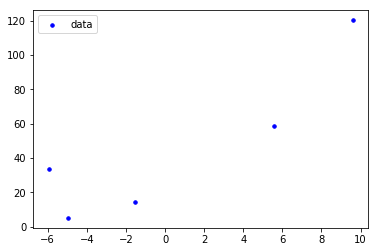

In [3]:
plt.scatter(X_sample, Y_sample, label="data", c='b', s=12)
plt.legend()
fig = plt.gcf()
fig.savefig("./images/linear_data.png")

<font size=4>
假如我們的 data 長這樣:
</font>

![linear-data](images/linear_data.png)

### 簡單線性迴歸

In [4]:
from sklearn.linear_model import LinearRegression, Lasso

In [5]:
print("X_sample:", X_sample.T)
print("Y_sample:", Y_sample.T)

X_sample: [[-5.95959596 -4.94949495 -1.51515152  5.55555556  9.5959596 ]]
Y_sample: [[  33.43576737    5.14324928   14.21857258   58.44681024  120.17674613]]


In [6]:
# fit
lin_reg = LinearRegression()
lin_reg.fit(X_sample, Y_sample)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
x_ = np.linspace(-6.5, 11, 20)[:, np.newaxis]

In [8]:
# predict
print("x_:", x_.T)
y_ = lin_reg.predict(x_)
print("y_:", y_.T)

x_: [[ -6.5         -5.57894737  -4.65789474  -3.73684211  -2.81578947
   -1.89473684  -0.97368421  -0.05263158   0.86842105   1.78947368
    2.71052632   3.63157895   4.55263158   5.47368421   6.39473684
    7.31578947   8.23684211   9.15789474  10.07894737  11.        ]]
y_: [[   3.90382682    9.44421897   14.98461112   20.52500327   26.06539543
    31.60578758   37.14617973   42.68657188   48.22696403   53.76735618
    59.30774833   64.84814048   70.38853263   75.92892478   81.46931694
    87.00970909   92.55010124   98.09049339  103.63088554  109.17127769]]


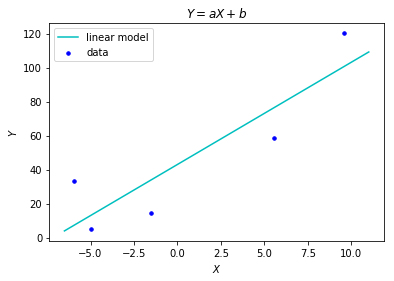

In [9]:
plt.scatter(X_sample, Y_sample, label="data", c='b', s=12)
plt.plot(x_, y_, label="linear model", c='c')
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("$Y=aX+b$")
plt.legend()
fig = plt.gcf()
fig.savefig("./images/fit_linear.png")

![fit-linear](images/fit_linear.png)

### 簡單線性迴歸與 L1 Regularization: Lasso

In [10]:
from mpl_toolkits.mplot3d import Axes3D

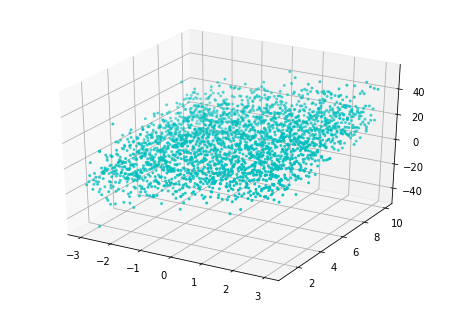

In [11]:
np.random.seed(3333)
x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(1, 10, 50)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 + 3.8*X1 + 1.5*X2 + 10*np.random.randn(50, 50)

ax = Axes3D(plt.gcf())
ax.scatter(X1, X2, zs=Z, c='c', s=4)
fig = plt.gcf()
fig.savefig("./images/lasso_data.png")

<font size=4>
假如我們的 data 長這樣:
</font>

![lasso-data](images/lasso_data.png)

In [12]:
# 簡單整理 data
data = np.array([X2, X1]).T.reshape((2500, 2))
z = Z.reshape((2500, 1))
print("data:\n", data[:10])
print("z:\n", z[:10].T)

data:
 [[ 1.         -3.        ]
 [ 1.18367347 -3.        ]
 [ 1.36734694 -3.        ]
 [ 1.55102041 -3.        ]
 [ 1.73469388 -3.        ]
 [ 1.91836735 -3.        ]
 [ 2.10204082 -3.        ]
 [ 2.28571429 -3.        ]
 [ 2.46938776 -3.        ]
 [ 2.65306122 -3.        ]]
z:
 [[-13.94811638  -6.00648179  -8.92993359 -45.86512792 -19.53088659
    0.06008418 -15.8314568   -3.40762128 -14.3115135    9.16435947]]


In [13]:
lasso = Lasso()

In [14]:
lasso.fit(data, z)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
lasso.coef_, lasso.intercept_

(array([ 2.35672749,  2.05177076]), array([-4.37215534]))

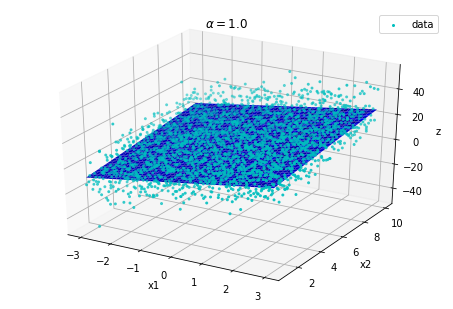

In [16]:
z_pred = lasso.predict(data)
ax = Axes3D(plt.gcf())
sc=ax.scatter(X1, X2, zs=Z, label="data", c='c', s=4)
ax.plot_surface(X1, X2, Z=z_pred.reshape((50, 50)), color='b')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel('z')
ax.set_title("$\\alpha=1.0$")
plt.legend()
fig = ax.figure
fig.savefig("./images/fit_lasso_alpha_1.png")

![fit-lasso](images/fit_lasso_alpha_1.png)

In [17]:
lasso2 = Lasso(alpha=8.0)
lasso2.fit(data, z)
lasso2.coef_

array([ 1.36035858,  0.        ])

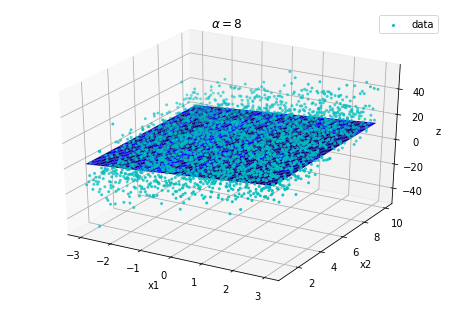

In [18]:
z_pred = lasso2.predict(data)
ax = Axes3D(plt.gcf())
sc=ax.scatter(X1, X2, zs=Z, label="data", c='c', s=4)
ax.plot_surface(X1, X2, Z=z_pred.reshape((50, 50)), color='b')
ax.set_xlabel("x1")
ax.set_ylabel('x2')
ax.set_zlabel("z")
ax.set_title("$\\alpha=8$")
plt.legend()
fig = ax.figure
fig.savefig("./images/fit_lasso_alpha_8.png")

![fit-lasso-alpha-8](images/fit_lasso_alpha_8.png)

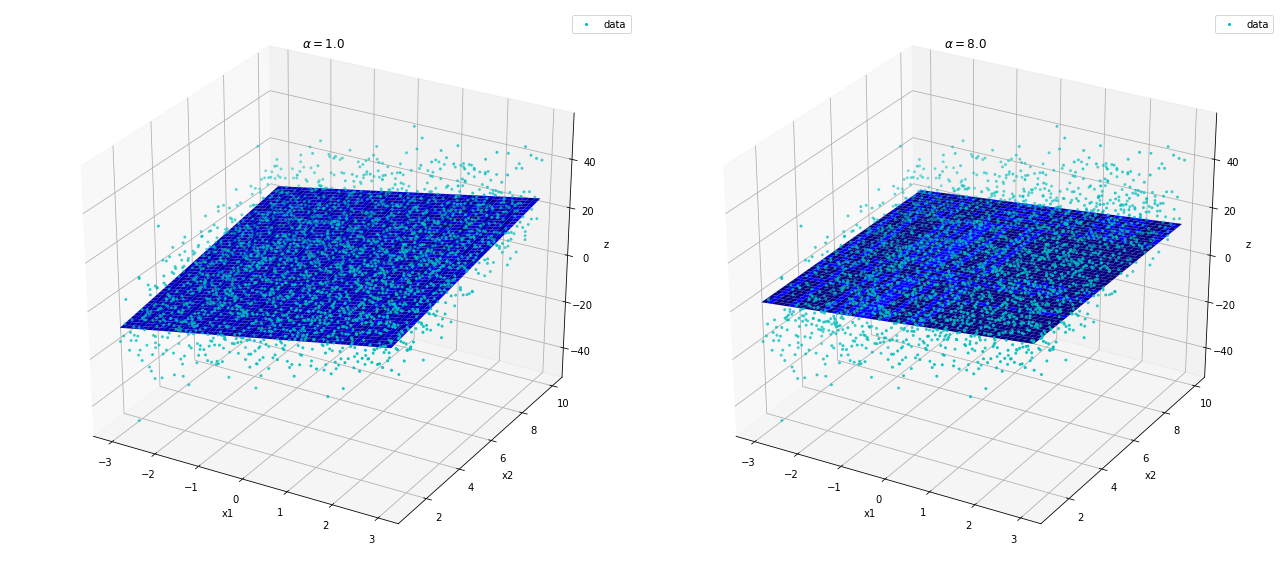

In [19]:
z_pred = lasso.predict(data)
fig = plt.gcf()
ax1 = fig.add_subplot(121, projection="3d")
sc=ax1.scatter(X1, X2, zs=Z, label="data", c='c', s=4)
ax1.plot_surface(X1, X2, Z=z_pred.reshape((50, 50)), color='b')
ax1.set_xlabel("x1")
ax1.set_ylabel('x2')
ax1.set_zlabel("z")
ax1.set_title("$\\alpha=1.0$")
ax1.legend()

z_pred = lasso2.predict(data)
ax2 = fig.add_subplot(122, projection="3d")
sc=ax2.scatter(X1, X2, zs=Z, label="data", c='c', s=4)
ax2.plot_surface(X1, X2, Z=z_pred.reshape((50, 50)), color='b')
ax2.set_xlabel("x1")
ax2.set_ylabel('x2')
ax2.set_zlabel("z")
ax2.set_title("$\\alpha=8.0$")
ax2.legend()
fig.set_size_inches((18, 8))
fig.tight_layout()
fig.savefig("./images/fit_lasso_alpha_all.png")

![fit-lasso-alpha-all](images/fit_lasso_alpha_all.png)

## Sckit-Learn Estimator Summary

- `fit(X, Y)`: 根據資料訓練模型
  - `X`: 資料特徵。
  - `Y`: 資料標記(例如分類)或目標值(迴歸)。不一定會有，譬如分群演算法不一定需要標記好的 `Y`。
  - 通常 `X` 的每個行會是一筆觀測值，`Y` 亦然。
- `predict(X)`: 用訓練好的模型去預測新的值。
  - `X`: 新資料的特徵。

## 錯越少越好? -- Overfitting

In [20]:
# Look at your data from Heven's eyes: 天神的 data
np.random.seed(3333)
num_samples = 5

true_a = 0.5
true_b = 3.0
true_c = 1.2
X = np.linspace(-10, 10, 100)[:, None]
Y = true_a + true_b*X + true_c*X**2 + 20*np.random.randn(100)[:,None]
index = np.random.choice(range(X.shape[0]), num_samples)
mask = np.isin(range(X.shape[0]), index)
X_sample = X[mask]
Y_sample = Y[mask]
X_test = X[~mask]
Y_test = Y[~mask]

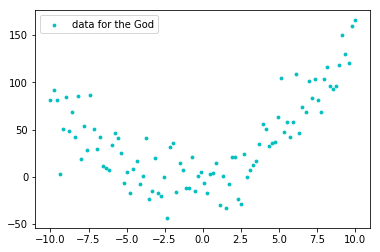

In [21]:
plt.scatter(X, Y, s=8, c='c', label="data for the God")
plt.legend(loc='upper left')
fig = plt.gcf()
fig.savefig("./images/overfit_all_data.png")

<font size=4>
如果我們是全能的天神，可以看到世上所有的 data
</font>

![overfit-all-data](images/overfit_all_data.png)

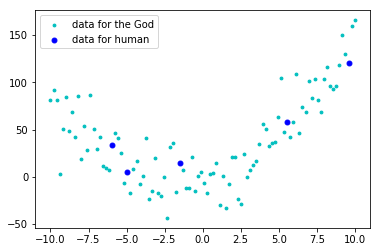

In [22]:
plt.scatter(X, Y, s=8, c='c', label="data for the God")
plt.scatter(X_sample, Y_sample, s=24, c='b', label="data for human")
plt.legend(loc='upper left')
fig = plt.gcf()
fig.savefig("./images/overfit_sampled_data.png")

<font size=4>
但凡人們只能看到部分的資料:
</font>

![overfit-sampled-data](images/overfit_sampled_data.png)

### Scikit-Learn Transformer: PolynomialFeatures

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
X_sample

array([[-5.95959596],
       [-4.94949495],
       [-1.51515152],
       [ 5.55555556],
       [ 9.5959596 ]])

#### fit_transform

In [25]:
poly_feature = PolynomialFeatures(degree=2)
poly_feature.fit_transform(X_sample)

array([[  1.        ,  -5.95959596,  35.516784  ],
       [  1.        ,  -4.94949495,  24.49750026],
       [  1.        ,  -1.51515152,   2.29568411],
       [  1.        ,   5.55555556,  30.86419753],
       [  1.        ,   9.5959596 ,  92.08244057]])

In [26]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
poly_feature.fit_transform(X_sample)

array([[ -5.95959596,  35.516784  ],
       [ -4.94949495,  24.49750026],
       [ -1.51515152,   2.29568411],
       [  5.55555556,  30.86419753],
       [  9.5959596 ,  92.08244057]])

<font size=4>
讓 loss (例如 mean square error 或分類錯誤率) 在最小，是不是個好主意呢?
</font>

試試看吧!

### Evaluation with Scikit-Learn

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [28]:
def fit_model(X, Y, degree=None):
    if degree:
        poly_feature = PolynomialFeatures(degree=degree, 
                                          include_bias=False)
        X_train = poly_feature.fit_transform(X)
    else:
        X_train = X
    Y_train = Y.copy()
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model, poly_feature

In [29]:
model_d2, poly_feature_d2 = fit_model(X_sample, Y_sample, 2)
model_d2, poly_feature_d2

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))

In [30]:
sqe_d2 = mean_squared_error(Y_sample, 
                            model_d2.predict(poly_feature_d2.fit_transform(X_sample)))

In [31]:
model_d4, poly_feature_d4 = fit_model(X_sample, Y_sample, 4)
model_d4, poly_feature_d4

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 PolynomialFeatures(degree=4, include_bias=False, interaction_only=False))

In [32]:
sqe_d4 = mean_squared_error(Y_sample, 
                            model_d4.predict(poly_feature_d4.fit_transform(X_sample)))

In [33]:
print("model with degree 4 better than degree 2? ", sqe_d4 < sqe_d2 and "Yes" or "No")

model with degree 4 better than degree 2?  Yes


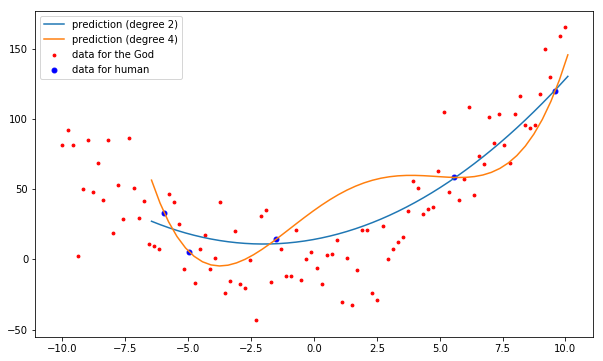

In [34]:
x = np.linspace(X_sample.min()-0.5, X_sample.max()+0.5, 50)
y_d4 = model_d4.predict(poly_feature_d4.fit_transform(x[:, None]))
y_d2 = model_d2.predict(poly_feature_d2.fit_transform(x[:, None]))
plt.plot(x, y_d2.flatten(), label="prediction (degree 2)")
plt.plot(x, y_d4.flatten(), label="prediction (degree 4)")
plt.scatter(X_test, Y_test, s=8, c='r', label="data for the God")
plt.scatter(X_sample, Y_sample, s=24, c='b', label="data for human")
plt.legend()
fig = plt.gcf()
fig.set_size_inches((10, 6))
fig.savefig("./images/overfit_linear_all_degree.png")

<font size=4>
但讓我們用天神之眼來看看:
</font>

![overfit-linear-all-degree](images/overfit_linear_all_degree.png)

#### Data Spliting

In [35]:
# Look at your data from Heven's eyes: 天神的 data
np.random.seed(3333)

true_a = 0.5
true_b = 3.0
true_c = 1.2
X = np.linspace(-10, 10, 100)[:, None]
# 只有神知道的式子
Y = true_a + true_b*X + true_c*X**2 + 20*np.random.randn(100)[:,None]

In [36]:
# 我們把拿到的 X 與 Y 分成兩塊
num_samples = X.shape[0]
index = np.random.choice(range(num_samples), 5)
mask = np.isin(range(num_samples), index)
X_train = X[mask]
Y_train = Y[mask]
X_test = X[~mask]
Y_test = Y[~mask]

In [37]:
print("training data:", X_train.shape, Y_train.shape)
print("testing data:", X_test.shape, Y_test.shape)

training data: (5, 1) (5, 1)
testing data: (95, 1) (95, 1)


In [38]:
model_d2, poly_feature_d2 = fit_model(X_train, Y_train, 2)
model_d2, poly_feature_d2

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))

In [39]:
model_d4, poly_feature_d4 = fit_model(X_train, Y_train, 4)
model_d4, poly_feature_d4

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 PolynomialFeatures(degree=4, include_bias=False, interaction_only=False))

In [40]:
sqe_d2 = mean_squared_error(Y_test, 
                            model_d2.predict(poly_feature_d2.fit_transform(X_test)))
sqe_d4 = mean_squared_error(Y_test, 
                            model_d4.predict(poly_feature_d4.fit_transform(X_test)))
print("model with degree 4 better than degree 2? ", sqe_d4 < sqe_d2 and "Yes" or "No")

model with degree 4 better than degree 2?  No


In [41]:
from sklearn.base import TransformerMixin

print(isinstance(poly_feature, TransformerMixin))

True


### Summary

- `TransformerMixin`
  - `transform(X)`: 顧名思義，可用來轉換 `X`
  - `fit_transform(X)`: 根據給定的 `X`，學習相關參數並回傳轉換好的 `X`
    - 例如 `sklearn.preprocessing.Normalizer`
- Overfitting
  - 模型複雜度過高，導致再沒見過的 data 上表現很差。

## Sckikit-Learn 聯結精彩模型每一步: Pipeline

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipe_d2 = Pipeline(steps=[("poly_feature", PolynomialFeatures(degree=2, include_bias=False)),
                          ("model", LinearRegression())])
pipe_d2.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('poly_feature', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

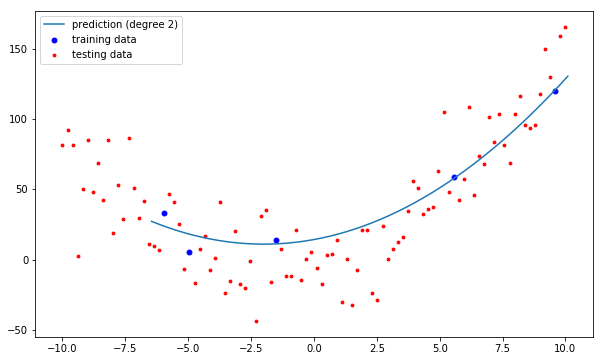

In [44]:
x = np.linspace(X_train.min()-0.5, X_train.max()+0.5, 50)
y = pipe_d2.predict(x[:,None])
plt.plot(x, y, label="prediction (degree 2)")
plt.scatter(X_train, Y_train, s=24, c='b', label="training data")
plt.scatter(X_test, Y_test, s=8, c='r', label="testing data")
plt.legend()
fig = plt.gcf()
fig.set_size_inches((10, 6))
fig.savefig("./images/fit_pipe.png")

![fit-pipe](images/fit_pipe.png)

## 自動化選取最好的模型配置

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
pipe = Pipeline(steps=[("poly_feature", PolynomialFeatures(degree=3, include_bias=False)),
                       ("model", LinearRegression())])

In [47]:
pipe.named_steps["poly_feature"]

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

In [48]:
pipe.named_steps["model"]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# 稍微把 training data 弄大一點兒
np.random.seed(3333)
index = np.random.choice(range(X.shape[0]), 20)
mask = np.array([False for _ in range(X.shape[0])])
mask[index] = True
X_train = X[mask]
Y_train = Y[mask]
X_test = X[~mask]
Y_test = Y[~mask]

In [50]:
searcher = GridSearchCV(pipe, 
                        param_grid={"poly_feature__degree": [1, 2, 3, 4],
                                    "model__normalize": [True, False]},
                        verbose=True)

In [51]:
searcher.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly_feature', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly_feature__degree': [1, 2, 3, 4], 'model__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [52]:
best_model = searcher.best_estimator_
best_model

Pipeline(memory=None,
     steps=[('poly_feature', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])

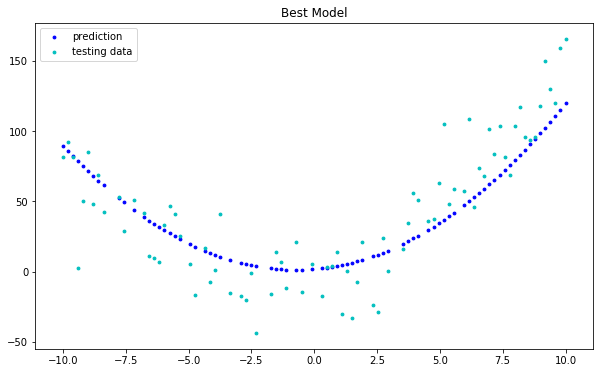

In [53]:
y_pred = best_model.predict(X_test)
plt.title("Best Model")
plt.scatter(X_test, y_pred, color='b', s=8, label="prediction")
plt.scatter(X_test, Y_test, color='c', s=8, label='testing data')
plt.legend()
fig = plt.gcf()
fig.set_size_inches((10, 6))
fig.savefig("./images/search_fit.png")

![search-fit](images/search_fit.png)

In [54]:
# 自行指定指標
searcher2 = GridSearchCV(pipe, 
                         param_grid={"poly_feature__degree": [1, 2, 4, 6],
                                     "model__normalize": [True, False]},
                         verbose=True,
                         scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [55]:
searcher2.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly_feature', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly_feature__degree': [1, 2, 4, 6], 'model__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=True)

In [56]:
best_model2 = searcher2.best_estimator_
best_model2

Pipeline(memory=None,
     steps=[('poly_feature', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])

## 來用真實資料玩玩: Hotel Review

In [67]:
from sklearn.decomposition import PCA
import pandas as pd

In [58]:
csv_path = "./expedia_hotel/hreviews_df.csv"
df = pd.read_csv(csv_path, engine='c')

In [59]:
rate_data = df[['ratingHotelCondition', 'ratingOverall', 'ratingRoomCleanliness',
                'ratingRoomComfort', 'ratingService']]

In [60]:
rate_data.shape

(94457, 5)

In [65]:
Y = rate_data['ratingOverall'].values[:,None]
X = rate_data.iloc[:, rate_data.columns != 'ratingOverall'].values

In [66]:
X.shape, Y.shape

((94457, 4), (94457, 1))

In [70]:
pipe = Pipeline(steps=[("poly_feature", PolynomialFeatures(include_bias=False)),
                       ("pca", PCA()),
                       ("model", Lasso())])

In [83]:
?GridSearchCV

In [84]:
searcher = GridSearchCV(pipe, 
                        param_grid={"poly_feature__degree": [2, 3, 4],
                                    "pca__n_components": [4, 6, 8],
                                    "model__alpha": [1.0, 8.0]},
                        verbose=True,
                        n_jobs=2)

In [85]:
index = np.random.choice(range(X.shape[0]), 30000)
mask = np.isin(range(X.shape[0]), index)
X_train = X[mask]
Y_train = Y[mask]
X_test = X[~mask]
Y_test= Y[~mask]

In [86]:
searcher.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


KeyboardInterrupt: 